## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap FIN scan (aggressive)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [3]:
directory = '/home/USER/notebooks/pcaps/nmap_fin_scan_aggressive'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [4]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.054511
Name: time, dtype: float64

In [5]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [6]:
scan_times
#duration_list

0    0.054511
1    0.074316
2    0.054613
3    0.059125
4    0.048696
5    0.063106
6    0.071420
7    0.058194
8    0.062917
9    0.050686
Name: Scan times, dtype: float64

In [7]:
temp = pd.DataFrame(duration_list)

In [8]:
temp.mean()

0    0.059758
dtype: float64

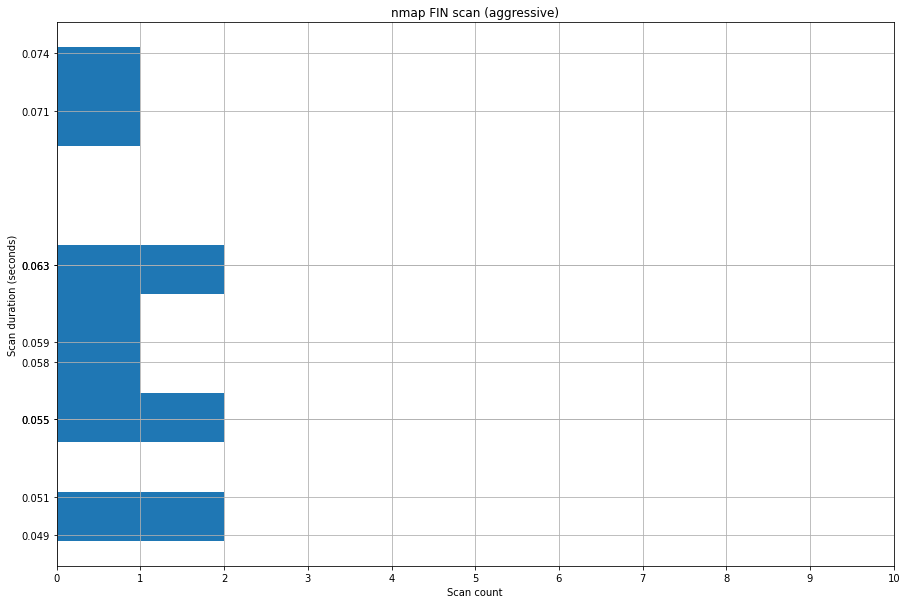

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,0.059758
std,0.008371
min,0.048696
25%,0.054536
50%,0.058660
75%,0.063059
max,0.074316


## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1195.1675415039062



## Order of ports scanned


In [14]:
scannr = []
sport = []
dport = []
ipid = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                ipid.append(scan['ip_id'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport,
                            'ipid': ipid
                           })

1 36700 22
2 36700 53
3 36700 25
4 36700 135
5 36700 111
6 36700 8888
7 36700 3389
8 36700 110
9 36700 3306
10 36700 8080
11 36700 587
12 36700 1025
13 36700 113
14 36700 995
15 36700 143
16 36700 445
17 36700 5900
18 36700 993
19 36700 256
20 36700 554
21 36700 21
22 36700 1723
23 36700 443
24 36700 1720
25 36700 139
26 36700 23
27 36700 80
28 36700 199
29 36700 161
30 36700 5962
31 36700 6005
32 36700 9002
33 36700 2260
34 36700 7007
35 36700 9999
36 36700 1130
37 36700 2046
38 36700 2040
39 36700 9071
40 36700 17988
41 36700 4445
42 36700 5214
43 36700 2111
44 36700 33899
45 36700 2144
46 36700 10628
47 36700 1152
48 36700 9929
49 36700 2001
50 36700 5060
51 36700 1687
52 36700 52848
53 36700 7921
54 36700 1047
55 36700 61900
56 36700 2920
57 36700 10012
58 36700 667
59 36700 1248
60 36700 1198
61 36700 13722
62 36700 5811
63 36700 1083
64 36700 1074
65 36700 366
66 36700 5963
67 36700 55055
68 36700 1075
69 36700 1658
70 36700 1076
71 36700 3325
72 36700 49157
73 36700 1044
74 3670

621 36700 3527
622 36700 20031
623 36700 3371
624 36700 1862
625 36700 32770
626 36700 10626
627 36700 8291
628 36700 6969
629 36700 13
630 36700 389
631 36700 31038
632 36700 1201
633 36700 3476
634 36700 1783
635 36700 44443
636 36700 7435
637 36700 9503
638 36700 5862
639 36700 55600
640 36700 9050
641 36700 1035
642 36700 1104
643 36700 6839
644 36700 1002
645 36700 5080
646 36700 9040
647 36700 1149
648 36700 1277
649 36700 500
650 36700 54328
651 36700 16000
652 36700 212
653 36700 458
654 36700 65000
655 36700 11111
656 36700 668
657 36700 179
658 36700 1501
659 36700 2557
660 36700 8292
661 36700 35500
662 36700 1175
663 36700 1840
664 36700 1111
665 36700 4444
666 36700 1271
667 36700 163
668 36700 1244
669 36700 14238
670 36700 1094
671 36700 9595
672 36700 5431
673 36700 6004
674 36700 5500
675 36700 1141
676 36700 10001
677 36700 8045
678 36700 1112
679 36700 8333
680 36700 49167
681 36700 19780
682 36700 4001
683 36700 902
684 36700 9898
685 36700 65389
686 36700 1057
687 

621 40197 2401
622 40197 9999
623 40197 70
624 40197 5009
625 40197 18988
626 40197 1521
627 40197 3703
628 40197 1085
629 40197 1105
630 40197 1043
631 40197 19801
632 40197 2045
633 40197 8193
634 40197 55555
635 40197 1114
636 40197 2909
637 40197 524
638 40197 1947
639 40197 10012
640 40197 8087
641 40197 5003
642 40197 800
643 40197 2119
644 40197 64680
645 40197 389
646 40197 7778
647 40197 2725
648 40197 12174
649 40197 648
650 40197 8652
651 40197 6129
652 40197 3889
653 40197 1272
654 40197 13722
655 40197 1147
656 40197 10024
657 40197 8651
658 40197 1812
659 40197 1042
660 40197 4111
661 40197 5566
662 40197 1132
663 40197 3689
664 40197 990
665 40197 2500
666 40197 5730
667 40197 1053
668 40197 464
669 40197 1057
670 40197 19315
671 40197 16016
672 40197 11110
673 40197 254
674 40197 700
675 40197 1095
676 40197 34571
677 40197 52822
678 40197 16113
679 40197 2010
680 40197 3071
681 40197 61532
682 40197 1594
683 40197 7002
684 40197 1100
685 40197 1026
686 40197 2522
687 4

620 48705 5544
621 48705 8193
622 48705 1066
623 48705 25735
624 48705 3689
625 48705 1805
626 48705 1147
627 48705 5101
628 48705 9618
629 48705 20222
630 48705 2020
631 48705 109
632 48705 3268
633 48705 444
634 48705 1085
635 48705 3301
636 48705 6100
637 48705 32779
638 48705 2967
639 48705 2068
640 48705 1192
641 48705 4900
642 48705 416
643 48705 8181
644 48705 783
645 48705 2119
646 48705 987
647 48705 1322
648 48705 49400
649 48705 648
650 48705 7676
651 48705 5033
652 48705 1064
653 48705 2106
654 48705 880
655 48705 3367
656 48705 27353
657 48705 1130
658 48705 4004
659 48705 65129
660 48705 7201
661 48705 27356
662 48705 301
663 48705 1863
664 48705 6005
665 48705 9220
666 48705 5200
667 48705 3580
668 48705 2811
669 48705 22939
670 48705 8089
671 48705 28201
672 48705 1503
673 48705 2121
674 48705 8254
675 48705 2038
676 48705 9000
677 48705 2492
678 48705 2111
679 48705 49
680 48705 992
681 48705 32775
682 48705 1352
683 48705 1185
684 48705 1154
685 48705 57797
686 48705 

673 59159 1042
674 59159 50800
675 59159 7019
676 59159 32775
677 59159 2323
678 59159 1007
679 59159 1041
680 59159 7007
681 59159 32785
682 59159 340
683 59159 1863
684 59159 6699
685 59159 5962
686 59159 1031
687 59159 50500
688 59159 1086
689 59159 1106
690 59159 2366
691 59159 5414
692 59159 1002
693 59159 1124
694 59159 3690
695 59159 6669
696 59159 500
697 59159 1148
698 59159 5903
699 59159 1126
700 59159 2038
701 59159 1077
702 59159 2006
703 59159 5960
704 59159 9091
705 59159 8222
706 59159 1417
707 59159 30718
708 59159 5002
709 59159 8088
710 59159 1047
711 59159 163
712 59159 6059
713 59159 2809
714 59159 1984
715 59159 3323
716 59159 4126
717 59159 13782
718 59159 58080
719 59159 541
720 59159 1152
721 59159 70
722 59159 2021
723 59159 50001
724 59159 1151
725 59159 32774
726 59159 19842
727 59159 6123
728 59159 8008
729 59159 4129
730 59159 6668
731 59159 2144
732 59159 3871
733 59159 1083
734 59159 8500
735 59159 3889
736 59159 17
737 59159 4002
738 59159 7778
739 5915

738 33140 44176
739 33140 1024
740 33140 6547
741 33140 1583
742 33140 646
743 33140 9618
744 33140 4343
745 33140 259
746 33140 3914
747 33140 2875
748 33140 11967
749 33140 683
750 33140 1334
751 33140 8022
752 33140 4129
753 33140 10025
754 33140 161
755 33140 2401
756 33140 1839
757 33140 2135
758 33140 5666
759 33140 2144
760 33140 5902
761 33140 5877
762 33140 545
763 33140 27715
764 33140 5915
765 33140 6007
766 33140 1124
767 33140 8099
768 33140 55056
769 33140 52673
770 33140 4001
771 33140 30
772 33140 9080
773 33140 873
774 33140 55055
775 33140 49155
776 33140 6502
777 33140 2007
778 33140 211
779 33140 1049
780 33140 3546
781 33140 1010
782 33140 9415
783 33140 16001
784 33140 1148
785 33140 12174
786 33140 4006
787 33140 2042
788 33140 1111
789 33140 52822
790 33140 280
791 33140 7777
792 33140 9929
793 33140 125
794 33140 1175
795 33140 7921
796 33140 1001
797 33140 5009
798 33140 2301
799 33140 8002
800 33140 2968
801 33140 22939
802 33140 8087
803 33140 5200
804 33140

786 41131 5907
787 41131 2998
788 41131 6059
789 41131 711
790 41131 2604
791 41131 40911
792 41131 5901
793 41131 3918
794 41131 6566
795 41131 65000
796 41131 1218
797 41131 9618
798 41131 5998
799 41131 8600
800 41131 50800
801 41131 5060
802 41131 2001
803 41131 49154
804 41131 1063
805 41131 1071
806 41131 7070
807 41131 9200
808 41131 9290
809 41131 24800
810 41131 427
811 41131 2967
812 41131 6839
813 41131 8652
814 41131 9593
815 41131 8087
816 41131 50500
817 41131 12345
818 41131 1352
819 41131 1145
820 41131 3801
821 41131 19315
822 41131 2601
823 41131 4848
824 41131 6100
825 41131 3000
826 41131 497
827 41131 9503
828 41131 8081
829 41131 6969
830 41131 4899
831 41131 1010
832 41131 4045
833 41131 280
834 41131 1164
835 41131 8085
836 41131 2068
837 41131 57294
838 41131 1137
839 41131 8031
840 41131 800
841 41131 9898
842 41131 30
843 41131 18101
844 41131 5730
845 41131 555
846 41131 57797
847 41131 9101
848 41131 1131
849 41131 9944
850 41131 5000
851 41131 5822
852 411

855 45135 2010
856 45135 705
857 45135 4445
858 45135 5221
859 45135 5825
860 45135 1104
861 45135 8600
862 45135 1089
863 45135 8291
864 45135 5087
865 45135 17988
866 45135 3221
867 45135 1040
868 45135 2009
869 45135 787
870 45135 416
871 45135 3766
872 45135 5911
873 45135 50636
874 45135 1840
875 45135 49175
876 45135 1081
877 45135 1123
878 45135 4443
879 45135 2040
880 45135 1998
881 45135 1076
882 45135 3001
883 45135 3476
884 45135 6839
885 45135 1045
886 45135 56738
887 45135 2105
888 45135 64623
889 45135 3918
890 45135 981
891 45135 2800
892 45135 3998
893 45135 524
894 45135 20221
895 45135 7920
896 45135 5080
897 45135 9503
898 45135 9666
899 45135 5004
900 45135 2869
901 45135 2161
902 45135 6510
903 45135 3000
904 45135 2005
905 45135 15003
906 45135 711
907 45135 15660
908 45135 1296
909 45135 1666
910 45135 52869
911 45135 7778
912 45135 1524
913 45135 8651
914 45135 8800
915 45135 1600
916 45135 25734
917 45135 5718
918 45135 2998
919 45135 1074
920 45135 7201
921 45

452 38129 1069
453 38129 3737
454 38129 1100
455 38129 7625
456 38129 10617
457 38129 16993
458 38129 1972
459 38129 1310
460 38129 8194
461 38129 61900
462 38129 50003
463 38129 30000
464 38129 10003
465 38129 1085
466 38129 5987
467 38129 6005
468 38129 5825
469 38129 2605
470 38129 5862
471 38129 7402
472 38129 1185
473 38129 10180
474 38129 2968
475 38129 1718
476 38129 4
477 38129 6566
478 38129 1131
479 38129 306
480 38129 7200
481 38129 5357
482 38129 5901
483 38129 8087
484 38129 8010
485 38129 9101
486 38129 4279
487 38129 8800
488 38129 3920
489 38129 1073
490 38129 1935
491 38129 16012
492 38129 1164
493 38129 10628
494 38129 49175
495 38129 1121
496 38129 19283
497 38129 6689
498 38129 5960
499 38129 1434
500 38129 16018
501 38129 1035
502 38129 3007
503 38129 1068
504 38129 51103
505 38129 6788
506 38129 20
507 38129 1038
508 38129 9500
509 38129 1494
510 38129 30951
511 38129 7002
512 38129 4002
513 38129 1138
514 38129 27356
515 38129 2010
516 38129 3814
517 38129 8088
5

35 52497 1174
36 52497 2191
37 52497 2003
38 52497 8002
39 52497 2047
40 52497 2638
41 52497 56737
42 52497 7402
43 52497 808
44 52497 1840
45 52497 992
46 52497 5002
47 52497 6129
48 52497 5221
49 52497 3370
50 52497 5822
51 52497 24800
52 52497 5959
53 52497 1594
54 52497 2602
55 52497 8100
56 52497 5030
57 52497 4343
58 52497 8600
59 52497 2875
60 52497 3784
61 52497 1972
62 52497 7920
63 52497 8443
64 52497 801
65 52497 4445
66 52497 9111
67 52497 873
68 52497 1199
69 52497 1121
70 52497 2004
71 52497 1068
72 52497 5222
73 52497 4126
74 52497 306
75 52497 3880
76 52497 783
77 52497 7019
78 52497 30951
79 52497 340
80 52497 1075
81 52497 2222
82 52497 458
83 52497 544
84 52497 280
85 52497 32
86 52497 1805
87 52497 1107
88 52497 7001
89 52497 7741
90 52497 40193
91 52497 6101
92 52497 2105
93 52497 1069
94 52497 37
95 52497 55056
96 52497 2383
97 52497 5226
98 52497 64680
99 52497 1247
100 52497 22939
101 52497 1124
102 52497 1072
103 52497 1301
104 52497 9003
105 52497 3371
106 524

118 61048 32778
119 61048 8089
120 61048 416
121 61048 11967
122 61048 19
123 61048 5850
124 61048 8899
125 61048 5718
126 61048 7001
127 61048 1032
128 61048 1044
129 61048 4444
130 61048 50800
131 61048 9502
132 61048 1053
133 61048 3869
134 61048 1718
135 61048 1248
136 61048 1000
137 61048 1556
138 61048 407
139 61048 5050
140 61048 52869
141 61048 3703
142 61048 1114
143 61048 2196
144 61048 5054
145 61048 26
146 61048 10000
147 61048 6009
148 61048 1001
149 61048 1064
150 61048 8200
151 61048 1132
152 61048 2557
153 61048 8800
154 61048 63331
155 61048 3945
156 61048 3493
157 61048 5810
158 61048 311
159 61048 6510
160 61048 555
161 61048 1417
162 61048 55056
163 61048 1971
164 61048 648
165 61048 9898
166 61048 765
167 61048 1687
168 61048 2160
169 61048 1043
170 61048 700
171 61048 2382
172 61048 5280
173 61048 5002
174 61048 3261
175 61048 8222
176 61048 545
177 61048 7921
178 61048 999
179 61048 6002
180 61048 81
181 61048 1010
182 61048 1935
183 61048 65129
184 61048 1002
18

785 61048 20222
786 61048 3005
787 61048 4111
788 61048 1029
789 61048 2366
790 61048 5802
791 61048 2717
792 61048 2046
793 61048 2008
794 61048 5811
795 61048 5500
796 61048 1098
797 61048 9101
798 61048 20
799 61048 3221
800 61048 1060
801 61048 2126
802 61048 3052
803 61048 1277
804 61048 30951
805 61048 3370
806 61048 5222
807 61048 8652
808 61048 1352
809 61048 11110
810 61048 1185
811 61048 7937
812 61048 6129
813 61048 1533
814 61048 5226
815 61048 6969
816 61048 16000
817 61048 481
818 61048 1046
819 61048 2007
820 61048 898
821 61048 161
822 61048 1036
823 61048 32779
824 61048 1045
825 61048 32783
826 61048 4129
827 61048 3268
828 61048 1102
829 61048 2301
830 61048 9003
831 61048 1700
832 61048 1065
833 61048 548
834 61048 544
835 61048 8042
836 61048 3878
837 61048 4848
838 61048 20000
839 61048 83
840 61048 6646
841 61048 52822
842 61048 2009
843 61048 8333
844 61048 32
845 61048 55600
846 61048 9000
847 61048 1311
848 61048 15000
849 61048 1998
850 61048 4000
851 61048 2

In [15]:
orders_port

,scannr,sport,dport,ipid
0,1,36700,22,44901
1,2,36700,53,41685
2,3,36700,25,61653
3,4,36700,135,14326
4,5,36700,111,6728
...,...,...,...,...
9995,996,61048,5544,48114
9996,997,61048,9917,34424
9997,998,61048,5901,10906
9998,999,61048,3971,10667


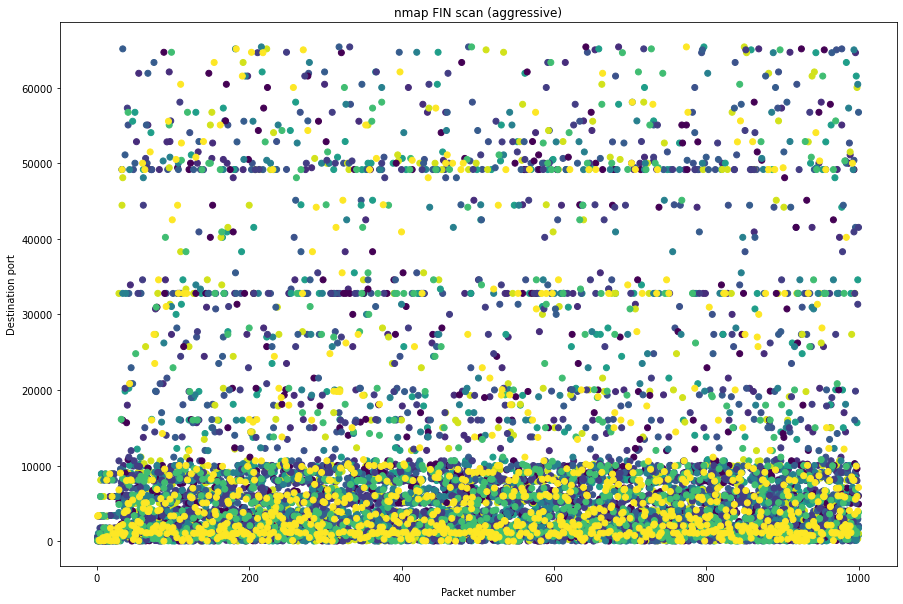

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

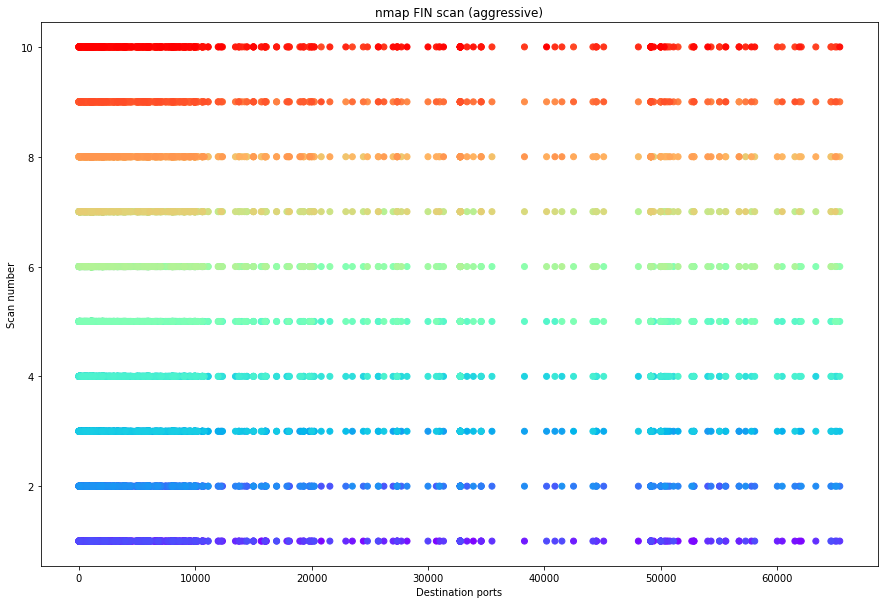

In [19]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [20]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

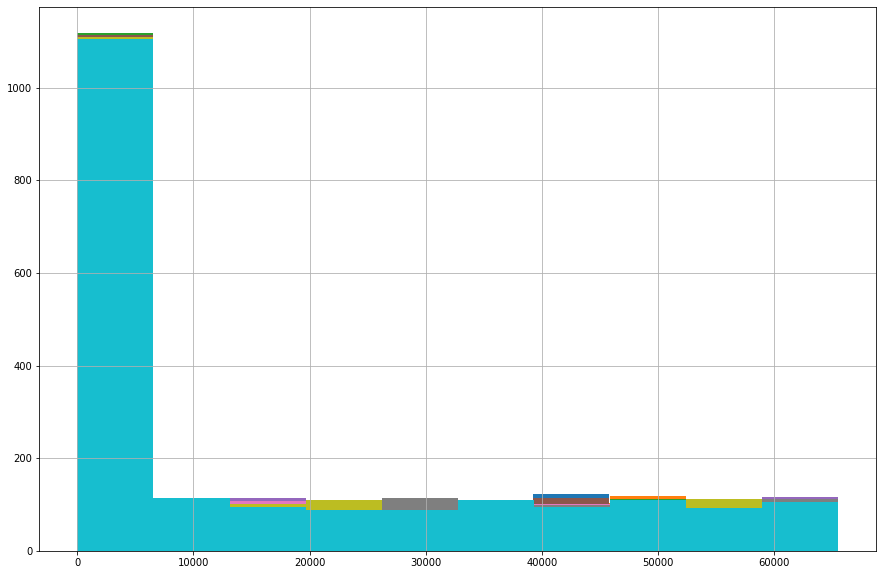

In [21]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

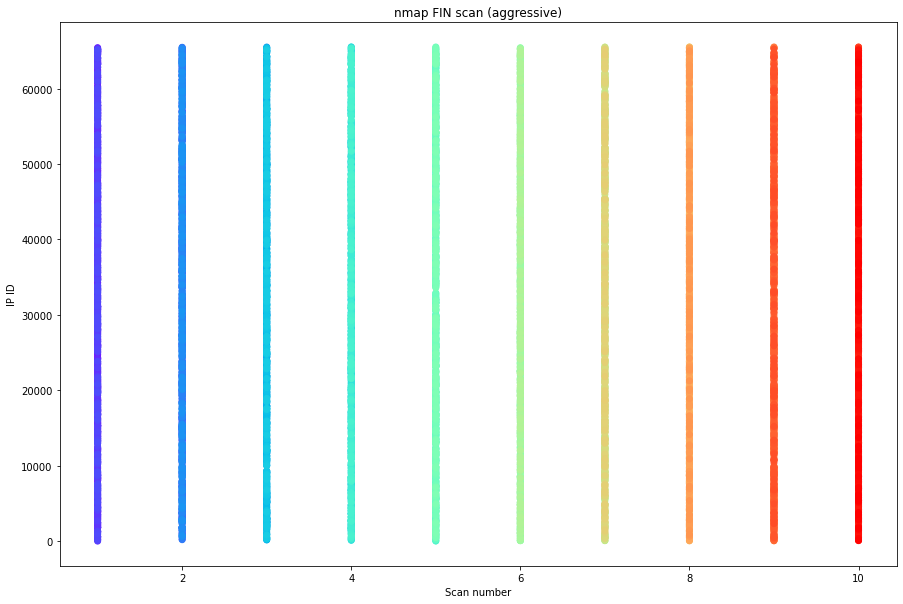

In [22]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)

x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

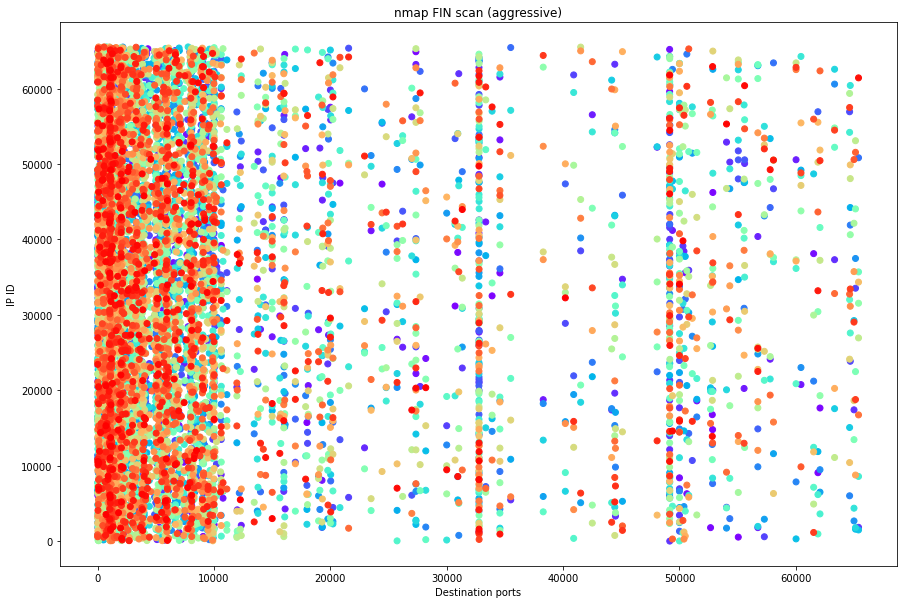

In [23]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

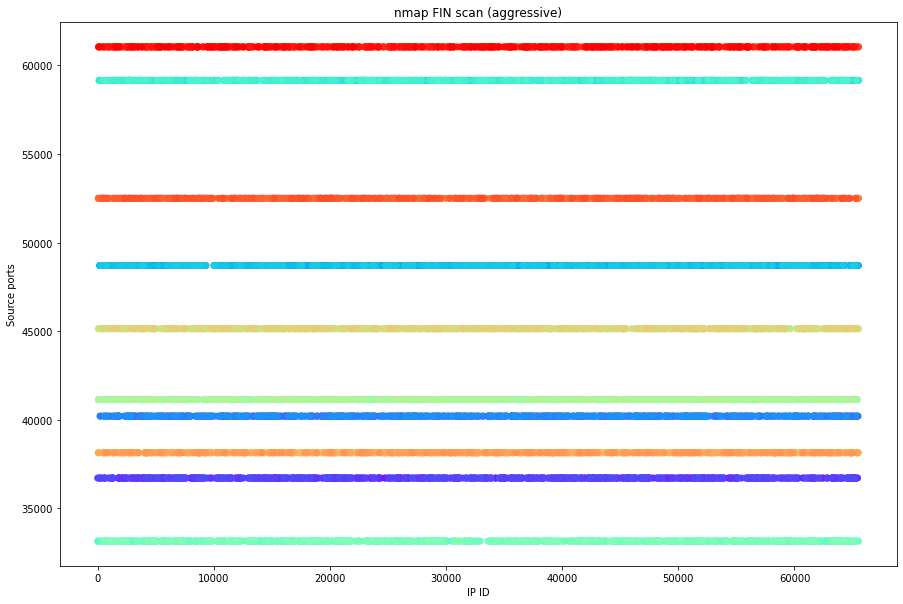

In [24]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [27]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 4108021921
Sequence number: 410

Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
S

Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
Sequence number: 826681789
S

Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 1141880566
Sequence number: 114

Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 3140413364
Sequence number: 314

Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 149

Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 1493050658
Sequence number: 149

Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 2323837447
Sequence number: 232

Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
Sequence number: 204887446
S

Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
S

Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
Sequence number: 624736515
S

Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 3645458644
Sequence number: 364

Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 4197711736
Sequence number: 419

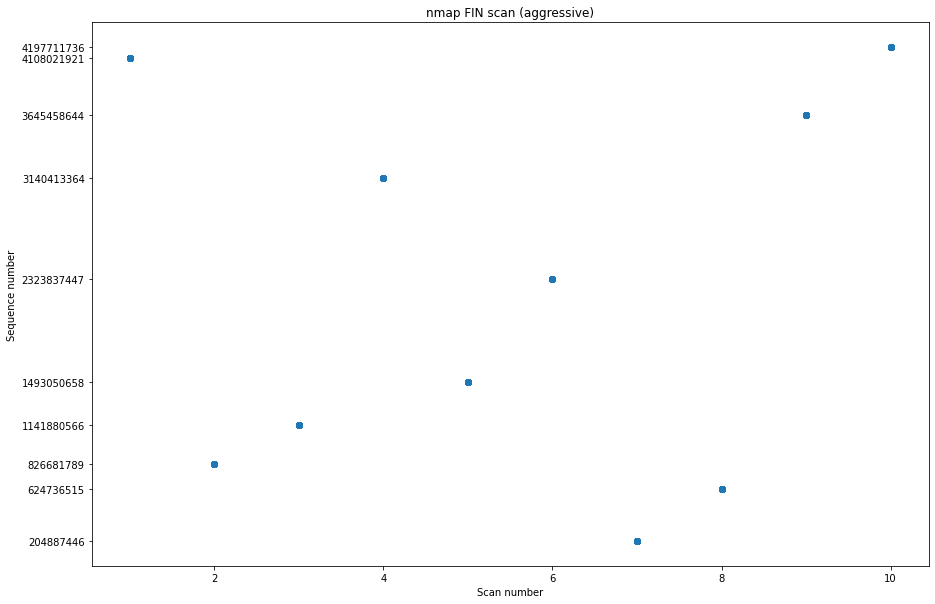

In [28]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


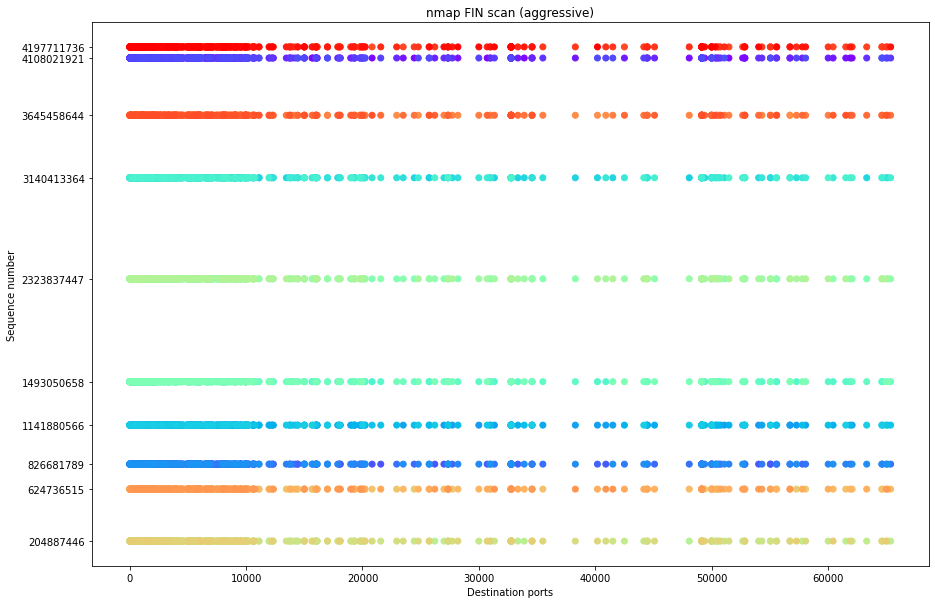

In [29]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

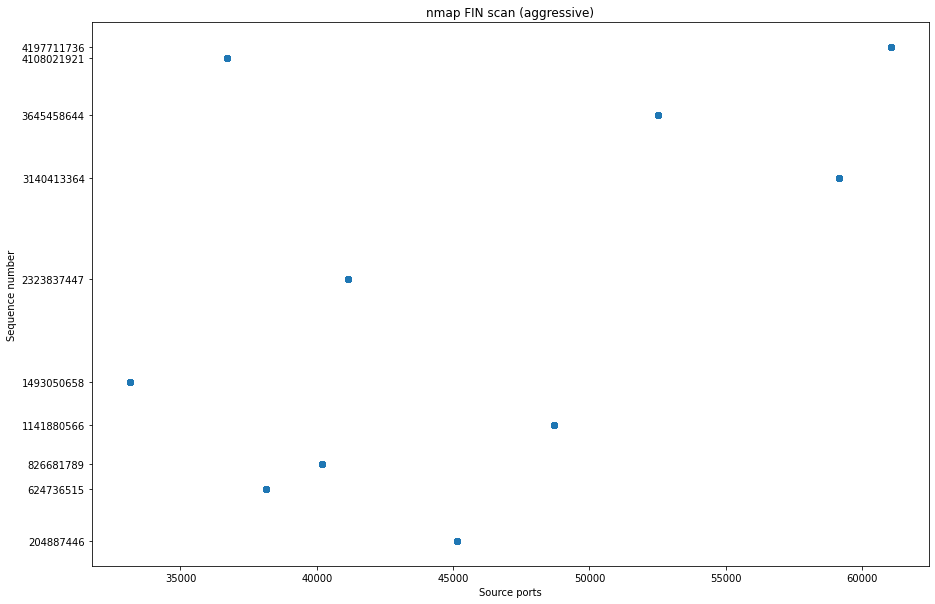

In [30]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [31]:
len(set(orders_port['sport']))

10

## Flags

In [32]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F